


Team X - __Ariel Mordetzki__ and __Mateo Stipaničić__

Universidad de Montevideo: Prof. Sebastián García Parra

_24th September 2022_  

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset-Analysis" data-toc-modified-id="Dataset-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset Analysis</a></span><ul class="toc-item"><li><span><a href="#Import-libraries-and-dataset" data-toc-modified-id="Import-libraries-and-dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries and dataset</a></span></li><li><span><a href="#Data-exploration-and-understanding" data-toc-modified-id="Data-exploration-and-understanding-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data exploration and understanding</a></span><ul class="toc-item"><li><span><a href="#Overall-analysis-of-dataset" data-toc-modified-id="Overall-analysis-of-dataset-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Overall analysis of dataset</a></span></li><li><span><a href="#Feature-review" data-toc-modified-id="Feature-review-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Feature review</a></span></li></ul></li><li><span><a href="#Dataset-discussion" data-toc-modified-id="Dataset-discussion-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Dataset discussion</a></span></li></ul></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Model-definition" data-toc-modified-id="Model-definition-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Model definition</a></span></li><li><span><a href="#Falta:" data-toc-modified-id="Falta:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Falta:</a></span></li></ul></li><li><span><a href="#Section" data-toc-modified-id="Section-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Section</a></span><ul class="toc-item"><li><span><a href="#Further-data-treatment" data-toc-modified-id="Further-data-treatment-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Further data treatment</a></span></li></ul></li><li><span><a href="#Section-4" data-toc-modified-id="Section-4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Section 4</a></span></li></ul></div>

___

# Dataset Analysis
> __In-depth analysis of given dataset__: In this section, we will analyze each feature's statistical properties, as well as the relevant relationships between them.


## Import libraries and dataset

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

#!pip install seaborn==0.11.0

# Dataset
wines_df = pd.read_csv('dataset-lab1.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset-lab1.csv'

___ 

## Data exploration and understanding


### Overall analysis of dataset

In [ ]:
# Show dataset format with first sample wines
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Print dataset size
wines_df.shape

(1591, 12)

The dataset is composed of 11 features and 1 target ('quality'), with a sample size of 1591 wines.

In [ ]:
# Consider data type
wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1591 non-null   float64
 1   volatile acidity      1591 non-null   float64
 2   citric acid           1591 non-null   float64
 3   residual sugar        1591 non-null   float64
 4   chlorides             1591 non-null   float64
 5   free sulfur dioxide   1591 non-null   float64
 6   total sulfur dioxide  1591 non-null   float64
 7   density               1591 non-null   float64
 8   pH                    1591 non-null   float64
 9   sulphates             1591 non-null   float64
 10  alcohol               1591 non-null   float64
 11  quality               1591 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.3 KB


In [ ]:
# Check null values
wines_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Confirming there are no null values, which might indicate good data quality (not in terms of bias, rather in a sense of completeness).

In [ ]:
# Check unique values for target variable
print(wines_df['quality'].unique())

[ 5  6  7 15  4 14  8 16  3]


 Unique values analysis shows no sample wines of quality 9, for example. Also, certain wines were evaluated with quality [14,15,16], which certainly raises concerns on the data quality.

In [ ]:
# Filtering outliers due to unsenseful data
wines_filter1 = wines_df[wines_df['quality'] <= 10]

# Instead, we could have chosen to filter by probability 
# wines_filter1 = wines_df['quality'].quantile(0.95)

#after filtering:

print(wines_filter1['quality'].unique())

[5 6 7 4 8 3]


Wine quality measurement ranges from 0 to 10. Unique values confirmation provides input on data that is out of that range, thus, we decide to treat these cases as __data errors__, regarding them as outliers. A wine quality beyond 10 does not make any business-wise sense. We work now with variable __wines_filter1__.

In [ ]:
# Break down dataset in percentiles
wines_filter1.describe(percentiles = [0.25,0.50,0.75])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000
mean,8.324559,0.527365,0.271770,2.539830,0.087509,15.867758,46.478589,0.996751,3.310838,0.658174,10.423331,5.639169
std,1.741589,0.178995,0.194921,1.413155,0.047148,10.434004,32.844095,0.001887,0.154569,0.169476,1.064751,0.807278
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.422500,2.600000,0.090000,21.000000,62.000000,0.997842,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


This description gives deeper statistical insight of the data.

In [ ]:
# Target variable count
wines_filter1['quality'].value_counts()

5    676
6    634
7    199
4     51
8     18
3     10
Name: quality, dtype: int64

Dataset seems to be __unbalanced__: the vast majority of samples are of quality 5 and 6. Also, there are no samples of, for example, a wine of quality 2, 9, even 10. 

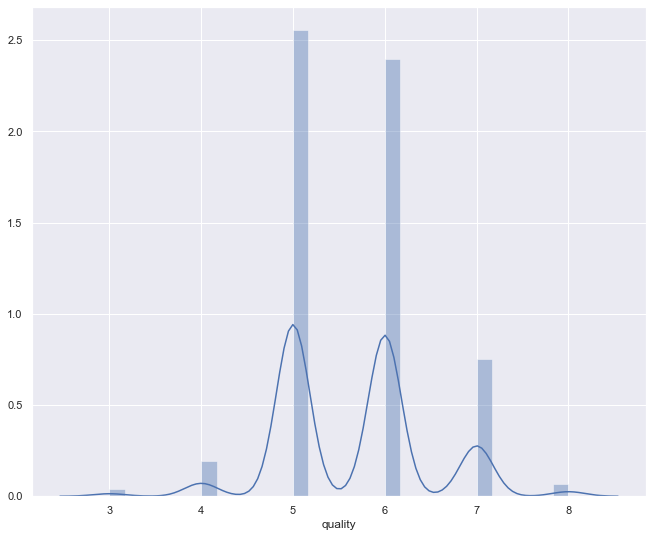

In [ ]:
# Target variable distribution
sns.set(rc={'figure.figsize':(11,9)}) # sets image size
sns.distplot(wines_filter1['quality'])

### Feature review

- Estudiar frecuencias (histograma) por atributo
- Boxplot for outliers para cada atributo

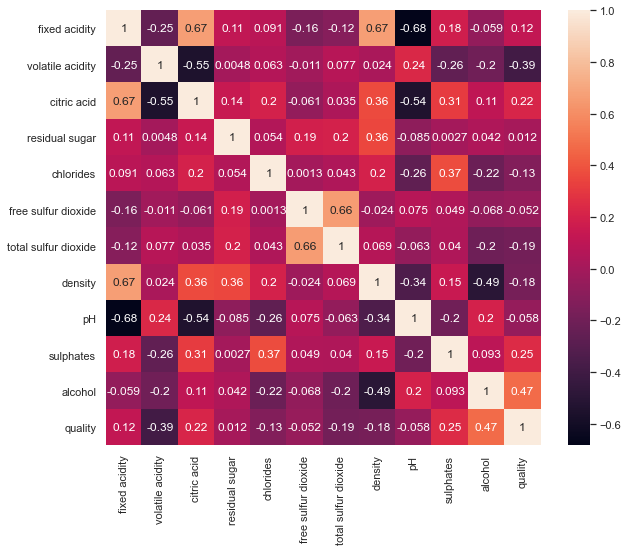

In [ ]:
# Presenting correlation matrix
f, ax = plt.subplots(figsize=(10, 8))
correlation = wines_filter1.corr()
sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=np.bool), square=True, ax=ax, annot=True)


We analyze two cases:
- Features strongly correlated between each other.
- Features weakly correlated with the target.

We thus check first for features weakly correlated with the target variable and decide whether to remove them in accordance to their correlation with other features (if it is correlated to other feature, then that first feature does not add relevance: we freely remove it). Therefore, from strongly correlated features, we keep those which correlate with the target in a senseful way.

In [ ]:
# Removing unwanted features
wines_filter2 = wines_filter1.drop(['pH', 'free sulfur dioxide', 'residual sugar'], axis = 1)

We remove __pH__ because it is weakly correlated with quality ($-0.058$) and we do so safely, since __pH__ is strongly correlated with __fixed acidity__ ($-0.68$), and we chose not to remove this latter feature because it is sufficiently correlated with the target variable ($0.12$). Thus, we are certain we are not losing valuable relationships/information between data.

Likewise, we will not consider in this problem __free sulfur dioxide__ based in analogus reasoning.

Although rather weakly correlated with __density__, __residual sugar__ is also removed due to its low correlation with the target variable ($0.012$).

We considered dropping __density__ or __fixed acidity__ due to their strong correlation between each other ($0.67$); however, since __pH__ was already removed from the feature outline, we decided to keep both in order to ensure sufficient dimensions in the problem.

## Dataset discussion

___

# Linear Regression
> The following is a linear regression model as to predict wine quality in basis of a given set of features. 
___

## Data preparation

> This division into testing and training will be used for the entire modelling, ensuring we are always measuring in regards to the same data (methodological step). 

In [ ]:
# Divide dataset into training and testing samples
from sklearn.model_selection import train_test_split
x = wines_filter2.loc[:,wines_filter2.columns != 'quality'] # features
y = wines_filter2 ['quality'] # target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 44) # split

## Model definition

In [ ]:
# Importing model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Creating object "model"
model = LinearRegression()

# Feed training dataset into model
model.fit(x_train, y_train)

# Result of the model
coef = pd.DataFrame(model.coef_, x.columns)
coef.columns = ['LR coeffecients:']
coef

,LR coeffecients:
fixed acidity,0.057404
volatile acidity,-1.003301
citric acid,-0.191143
chlorides,-1.798257
total sulfur dioxide,-0.002038
density,-28.038129
sulphates,0.998005
alcohol,0.261712


This means that our result is a hiperplane of formula:

* $x_1 = $ fixed acidity
* $x_2 = $ volatile acidity
* $x_3 = $ citric acid
* $x_4 = $ chlorides
* $x_5 = $ total sulfur dioxide
* $x_6 = $ density
* $x_7 = $ sulphates
* $x_8 = $ alcohol

$ Quality = f(x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8) = 0.1x_1 - 1x_2 - 0.2x_3 - 1.8x_4 - 0.0x_5 - 28x_6 + 1.0x_7 + 0.3x_8 $

In [ ]:
# Test set prediction
y_pred = model.predict(x_test)

# Root mean squared error from testing dataset
test_rms = (metrics.mean_squared_error(y_pred, y_test))**0.5
print('Mean quadratic error: \n' + str(test_rms))


Mean quadratic error: 
0.6610134998443896


In [ ]:
train_pred = model.predict(x_train) # prediction on the train test, only for constrating
print(f" MSE on predictions over the training dataset \n: {metrics.mean_squared_error(train_pred, y_train)}")

 MSE on predictions over the training dataset 
: 0.4176079311894777


In [ ]:
predicted_quality = np.round(y_pred)
print(predicted_quality)

[5. 5. 6. 6. 6. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 6. 6. 6. 6. 5. 5. 6. 6.
 5. 6. 6. 6. 5. 7. 6. 6. 5. 5. 5. 6. 6. 6. 5. 5. 5. 5. 7. 6. 5. 6. 5. 5.
 6. 6. 5. 7. 6. 6. 5. 6. 6. 5. 6. 6. 6. 6. 7. 5. 7. 5. 6. 6. 5. 6. 5. 6.
 5. 5. 6. 6. 5. 5. 5. 6. 6. 5. 5. 6. 5. 6. 6. 7. 6. 5. 5. 5. 6. 6. 6. 6.
 6. 5. 7. 5. 6. 6. 6. 6. 5. 5. 6. 5. 6. 5. 6. 6. 6. 6. 5. 5. 6. 6. 5. 6.
 5. 6. 5. 5. 5. 6. 5. 6. 5. 6. 5. 6. 6. 5. 5. 5. 5. 7. 5. 6. 6. 5. 7. 5.
 6. 5. 6. 5. 4. 6. 7. 6. 6. 6. 6. 5. 6. 6. 7. 6. 6. 5. 6. 5. 5. 6. 5. 6.
 5. 6. 5. 6. 5. 5. 5. 6. 5. 6. 6. 6. 6. 6. 5. 6. 6. 6. 5. 5. 6. 5. 6. 6.
 6. 6. 6. 7. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 7. 6. 5. 6. 6. 6. 6. 6. 7. 5.
 5. 6. 5. 6. 7. 6. 5. 6. 5. 6. 5. 6. 5. 6. 6. 5. 5. 5. 5. 6. 5. 6. 6. 6.
 6. 5. 6. 6. 6. 6. 7. 6. 5. 5. 5. 6. 5. 6. 5. 6. 5. 7. 5. 5. 5. 6. 5. 5.
 5. 6. 6. 6. 6. 6. 5. 5. 6. 6. 5. 6. 5. 6. 5. 6. 5. 5. 5. 5. 6. 6. 6. 5.
 5. 5. 6. 6. 6. 6. 5. 6. 6. 6. 5. 6. 5. 6. 5. 6. 6. 6. 6. 5. 6. 6. 6. 6.
 5. 6. 6. 5. 6. 5.]


## Falta:
* Analice los resultados obtenidos. 
* Revise y discuta si existen mecanismos para mejorar las métricas que arroja este modelo.*


# Section
___

## Further data treatment

In order to implement any classification methods, one must add an "etiquete" column to the dataframe, that will act as a *qualitative* variable. This new variable will strongly depend on the "quality" feature.

For instance, we shall map the quality scores as follows:

* quality $\leq 5$ is BAD
* quality $ > 5$  is GOOD

ESTA ES LA FAMOSA COTA DE LA REGRESION LOGISTICA? 

In [ ]:
 
wines_filter2['quality'] = wines_filter2['quality'].apply(lambda x: 'bad' if x < 6 else 'good')

# el .apply aplioca una funcion a la columna "qualities". La funcion la defino como lambda, es como una comprenhension list pero de funciones
# basicamente defino la funcion x, que retorna "bad" si x < 6 o "good" en otro caso. El .apply, para todo x, aplica esa funcion
# lambda(x) = bad si x < 6
# lambda(x) = good si x >= 6, y el .apply aplica para todo x esa funcion. 

#lets analyze what happened:
wines_filter2.head()



,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,bad
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,bad
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,bad
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,good
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,bad


In [ ]:
# We changed the quality feature from cuantitative to qualitative, lets do some statistics:
wines_filter2['quality'].value_counts()


good    851
bad     737
Name: quality, dtype: int64

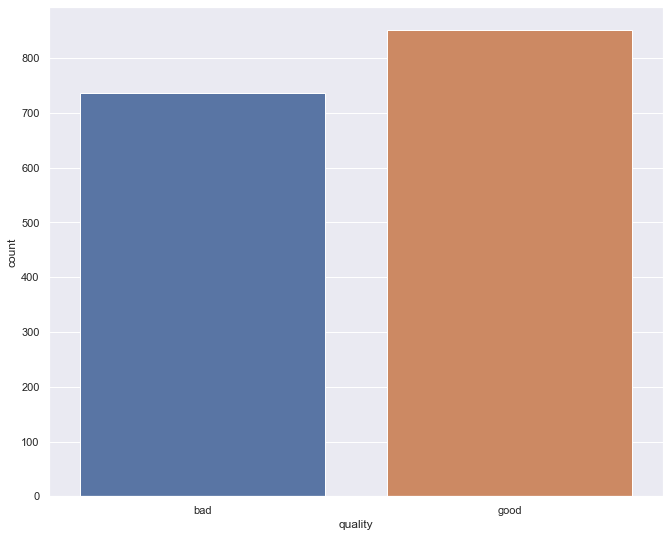

In [ ]:
sns.countplot(wines_filter2['quality'])

In [ ]:
# Redefining y variable into classes
y = wines_filter2 ['quality'] # target variable

# Re-shuffling the data with our new y variable using the same 80-20 rule and random state.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 44) # split


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# creating the model
model = LogisticRegression() #HIPERPARAMETROS? 

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))


Training accuracy : 0.7456692913385827
Testing accuracy : 0.7515723270440252
              precision    recall  f1-score   support

         bad       0.68      0.76      0.72       133
        good       0.81      0.75      0.78       185

    accuracy                           0.75       318
   macro avg       0.75      0.75      0.75       318
weighted avg       0.76      0.75      0.75       318

[[101  32]
 [ 47 138]]


C:\Users\Ariel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

#print(y_pred)
print(f"number of bad wines: {np.sum(y_pred =='bad')}") 

#para mateo: ypred == 'bad' es un array de booleanos, que vale TRUE si ypred[i] == 'bad'
#por eso sumo todo eso para calcular cuantos bad hay, en python true == 1

print(f"number of good wines: {np.sum(y_pred == 'good')}")

number of bad wines: 148
number of good wines: 170


ACA SACMOS CONCLUSOINES MATEO DALE GAS 


El naive bayes nos vimos en mega recontra disney. Tengo dudas para el profe. Mañana le hacemos




# Section 4
--


El knn es......


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.6698113207547169
              precision    recall  f1-score   support

         bad       0.59      0.68      0.63       133
        good       0.74      0.66      0.70       185

    accuracy                           0.67       318
   macro avg       0.67      0.67      0.67       318
weighted avg       0.68      0.67      0.67       318

[[ 90  43]
 [ 62 123]]


Aca tenemos para hablar

In [ ]:
#print(y_pred)
print(f"number of bad wines using KNN: {np.sum(y_pred =='bad')}") 

#para mateo: ypred == 'bad' es un array de booleanos, que vale TRUE si ypred[i] == 'bad'
#por eso sumo todo eso para calcular cuantos bad hay, en python true == 1

print(f"number of good wines usign KNN: {np.sum(y_pred == 'good')}")

number of bad wines using KNN: 152
number of good wines usign KNN: 166
